### HBI Applied to Synthetical ERT Data of an Unconfined Aquifer

Hybrid Bayesian Inversion (HBI) was applied to a synthetic ERT dataset representing an unconfined aquifer. The background resistivity model consisted of a 400 Ω·m half-space containing a low-resistivity zone (5 Ω·m) located between 34–44 m horizontally and at depths between 2.0–3.0 m (see figure below). The groundwater resistivity model was calculated as indicated in Bascur & Yañez (2025), using the parameters: $\rho_o$ = 50 Ω·m, $\beta$ = –0.5 (i.e., assuming a negative relationship between electrical conductivity and hydraulic conductivity) (CK-relationship), and a water table depth at the center of the model equal to $Z_{wto}$ = 1.0 m.

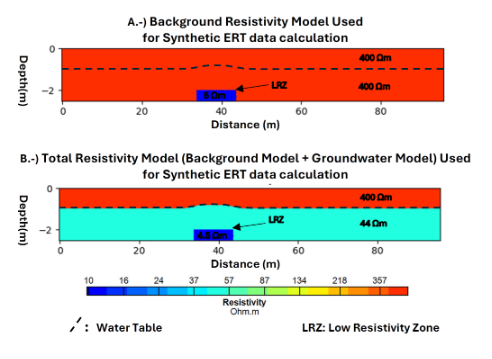

The synthetic Electrical Resistivity Tomography (ERT) dataset, consisting of 215 measurements, was simulated (Res2Dmod) using a dipole-dipole array with 48 electrodes, 2 m electrode spacing, and Tx–Rx separations ranging from N = 1 to 5. Gaussian noise with a standard deviation of 5% of the data amplitude was added. For forward modeling, the subsurface was discretized into a grid of 56 vertical by 115 horizontal cells (totaling 6,440 cells), with cell dimensions of 0.166 m in height and 1 m in width within the electrode-covered section.

Using HBI on the synthetic ERT dataset, both the background resistivity and the posterior PDFs of the following groundwater model parameters were estimated:

- Water table depth
- Porosity
- Beta (correlation factor in the CK relationship)
- Aquifer bulk resistivity

Various HBI runs were performed using different initial and reference background resistivity models, represented as half-spaces ranging from 50 to 400 Ω·m. The objective was to evaluate the impact of assuming different background models on the accuracy of the posterior PDF estimations. Finally, an independent estimation of the posterior PDFs for the groundwater model parameters was carried out using Bayesian inference, based on the same background model employed in the synthetic ERT data generation



In [2]:
import sys
sys.path.insert(0, '../../Source/')
sys.path.insert(0, '../../Utils/')

In [4]:
import paramplots
import plot_model_2d
import Zwt
import matplotlib.pyplot as plt
import numpy as np

First, the log files containing the evolution of $\log P(\sigma_{bk} \mid d)$ for all HBI runs were read and plotted. 


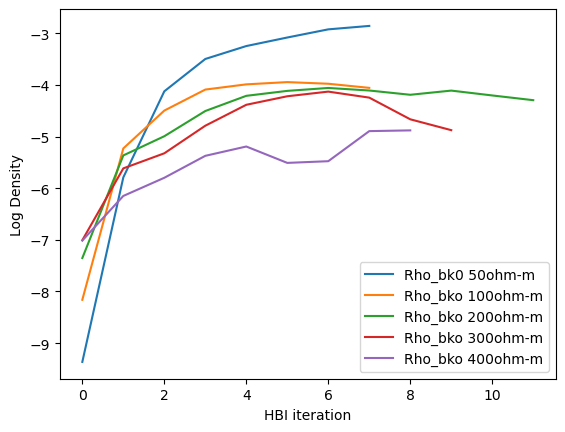

In [6]:
HBIruns_dirs=['Rho_bk0 50ohm-m','Rho_bko 100ohm-m','Rho_bko 200ohm-m','Rho_bko 300ohm-m','Rho_bko 400ohm-m']
legend=[]
max_iter=[]
for i in np.arange(len(HBIruns_dirs)):
    logs=plot_model_2d.load_logs('./'+HBIruns_dirs[i]+'/Iterations')
    iters=logs[:,0]
    Psigma_bk=-logs[:,1]
    max_iter.append(np.argmax(Psigma_bk))
    plt.plot(iters,Psigma_bk)
    plt.xlabel('HBI iteration')
    plt.ylabel('Log Density')
    legend.append(HBIruns_dirs[i])
#plt.title('log $P(\sigma_{bk}|d)$')
plt.legend(legend)

For each HBI run, plot the inverted models estimated at the iteration with the maximum log$P(\sigma_{bk}|d)$.

-**Top plot**: Inverted background model

-**Middle plot**: Expected groundwater model

-**Bottom plot**: Inverted total model (background + expected groundwater models)


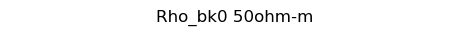

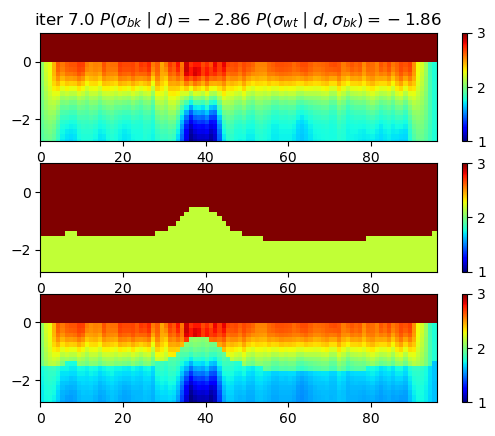

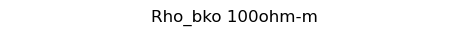

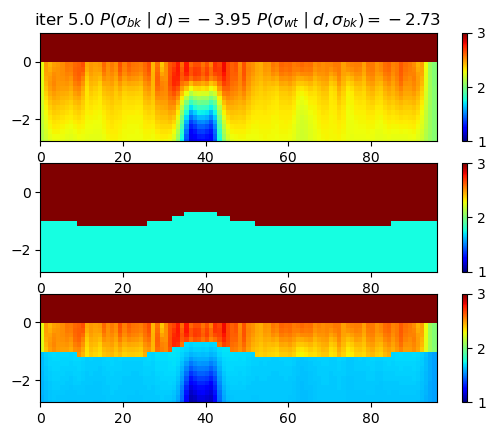

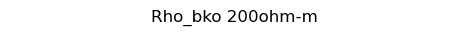

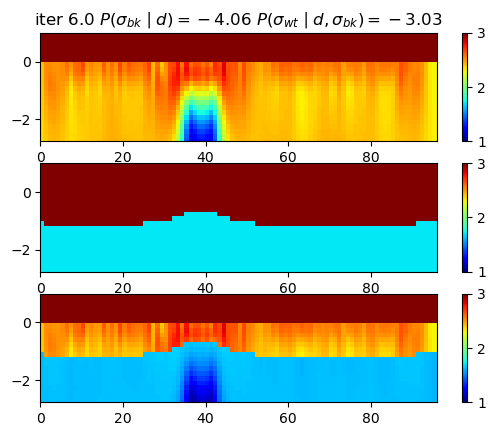

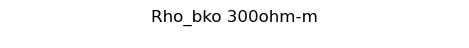

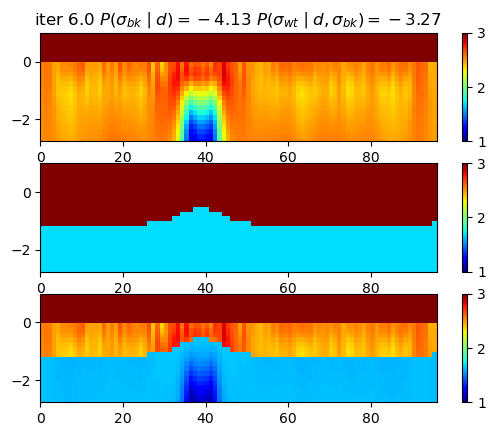

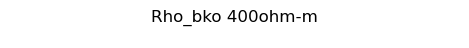

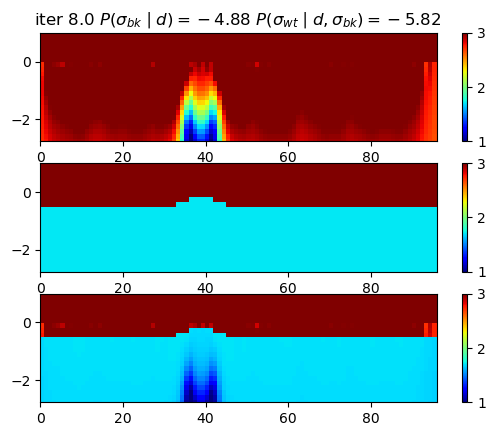

In [9]:
HBIruns_dirs=['Rho_bk0 50ohm-m','Rho_bko 100ohm-m','Rho_bko 200ohm-m','Rho_bko 300ohm-m','Rho_bko 400ohm-m']
for i in np.arange(len(HBIruns_dirs)):
        plt.figure(figsize=[5.8,0.1])
        plt.plot([0,5.8],[0,0.1],'.w')
        plt.gca().axis('off')
        plt.title(HBIruns_dirs[i])
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()
        plt.figure()
        models=plot_model_2d.plot_models('./'+HBIruns_dirs[i],max_iter[i],estep_samples=2000)
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()
    

        if i >= len(HBIruns_dirs):
            break
        

For each HBI run, plot the posterior probability density functions (PDFs) estimated at the iteration with the maximum $log P(\sigma_{bk}|d)$. 

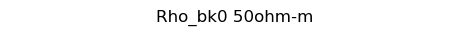

<Figure size 640x480 with 0 Axes>

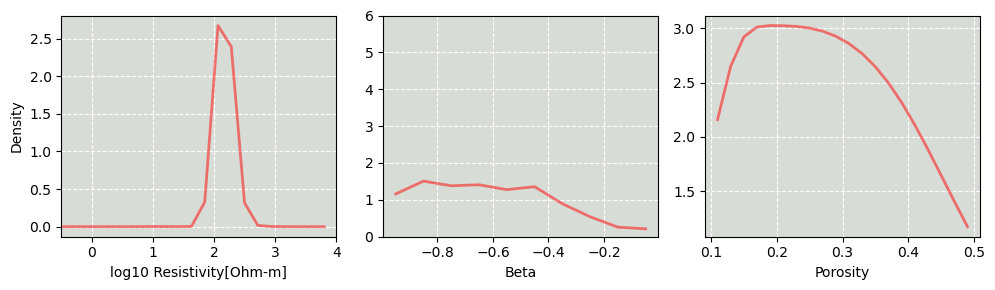

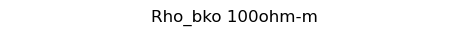

<Figure size 640x480 with 0 Axes>

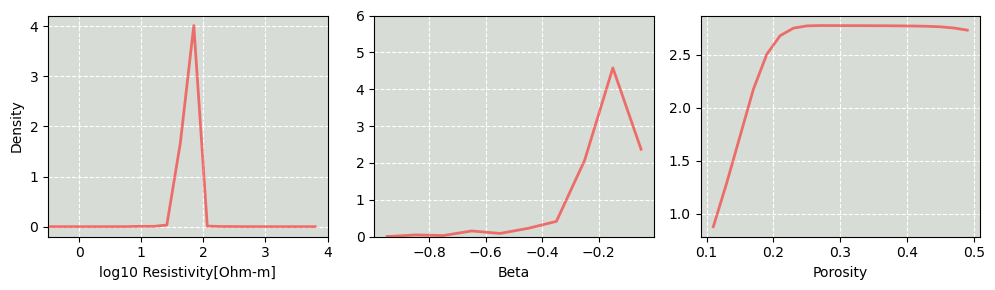

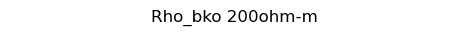

<Figure size 640x480 with 0 Axes>

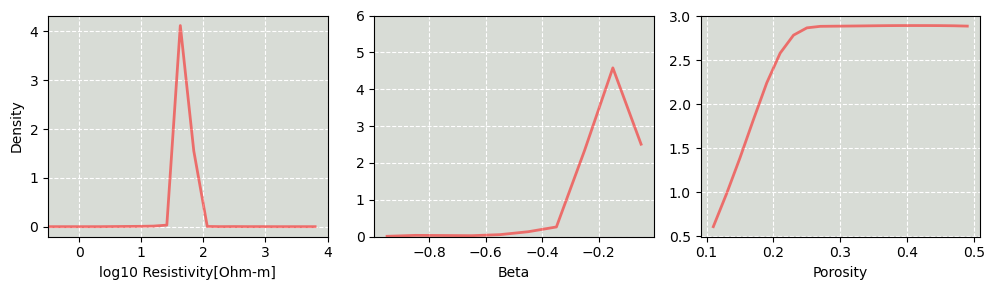

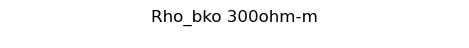

<Figure size 640x480 with 0 Axes>

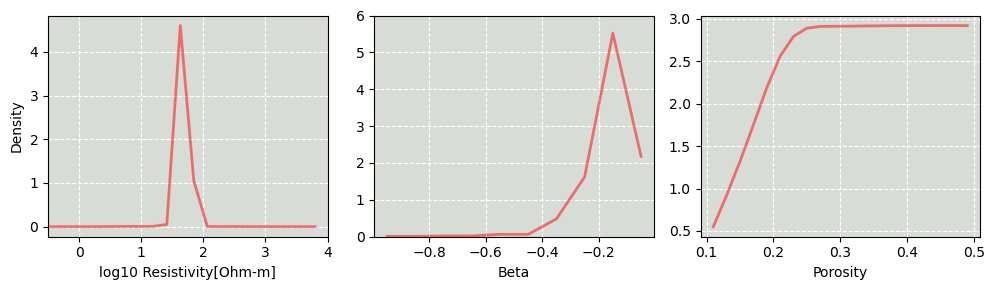

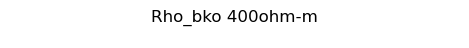

<Figure size 640x480 with 0 Axes>

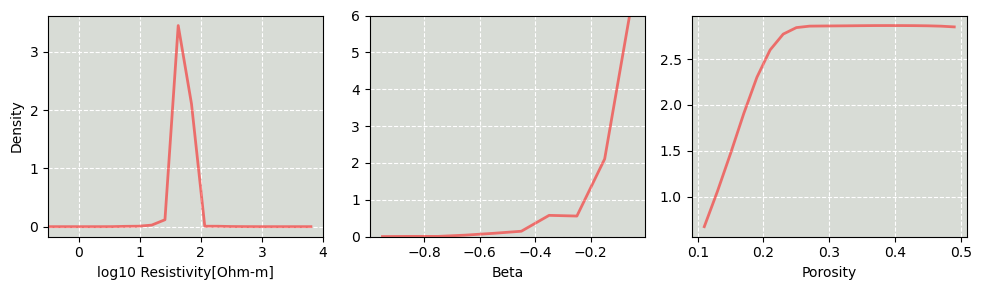

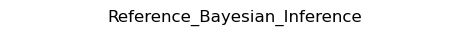

<Figure size 640x480 with 0 Axes>

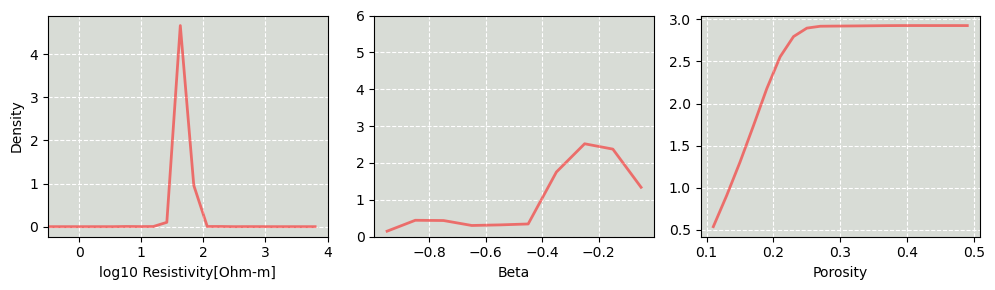

In [14]:
#Plot HBI results
HBIruns_dirs=['Rho_bk0 50ohm-m','Rho_bko 100ohm-m','Rho_bko 200ohm-m','Rho_bko 300ohm-m','Rho_bko 400ohm-m']
for i in np.arange(len(HBIruns_dirs)):
        plt.figure(figsize=[5.8,0.1])
        plt.plot([0,5.8],[0,0.1],'.w')
        plt.title(HBIruns_dirs[i])
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()
        plt.gca().axis('off')
        plt.figure()
        paramplots.paramplots('./'+HBIruns_dirs[i],max_iter[i])
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()


#Plot reference results
plt.figure(figsize=[5.8,0.1])
plt.plot([0,5.8],[0,0.1],'.w')
plt.title('Reference_Bayesian_Inference')
plt.gcf().canvas.draw()
plt.gcf().canvas.flush_events()
plt.gca().axis('off')
plt.figure()
paramplots.paramplots('./'+'Reference_Bayesian_Inference',0,estep_samples=1000)
plt.gcf().canvas.draw()
plt.gcf().canvas.flush_events()


